# Response of a neo-Hookean material

In this notebook, the displacement- and force-controlled compression of a neo-Hookean sample is simulated.

In [1]:
import ucompress as uc
import matplotlib.pyplot as plt

To start, the parameter values and the model must be defined.  The default parameter values found in the `DimensionalNeoHookean` class are used.  In this class, the dimensional parameter values are defined first.  Then, the dimensional parameter values are automatically converted into non-dimensional parameters.  This conversion is optional, but it ensures the performance of the solvers will be optimal.  Moreover, the results of the solvers will also be non-dimensional.

In [2]:
pars = uc.parameters.example_parameters.DimensionalNeoHookean()

Now we define the model, which requires choosing the mechanics (stress-strain relation) and the permeability of the material.  In this case, we choose a neo-Hookean law and use a permeability that is constant in the deformed (Eulerian) state.

In [3]:
model = {
    "mechanics": uc.mechanics.NeoHookean(pars),
    "permeability": uc.permeability.Constant(pars)
}

## Displacement-controlled compression

The problem for a displacement-controlled experiment is set up using the `DisplacementControlled` class from the experiments module:

In [4]:
problem = uc.experiments.DisplacementControlled(model, pars)

First, the instantaneous response of the sample using the `initial_response` method.  This returns an object from the `Solution` class.  Since the parameters in the `par` variable are dimensionless, the solution object will also be dimensionless.  The solution is then re-dimensionalised by calling the `re-dimensionalise` method.  The force on the platten is then printed to the screen:

In [5]:
# compute the initial response
sol_instant = problem.initial_response()

# re-dimensionalise the solution
sol_instant.redimensionalise(pars)

# print the force to the screen
print(f'Initial force is {sol_instant.F:.2f} N')

Initial force is -13.74 N


The time-dependent response to compression can be calculated by calling the `transient_response` method.  Similar to above, the output will be non-dimensional and stored in an object from the `Solution` class.  

In [6]:
sol = problem.transient_response()
sol.redimensionalise(pars)

Having simulated the experiment and re-dimensionalised the result, the force on the platten is plotted as a function of time.

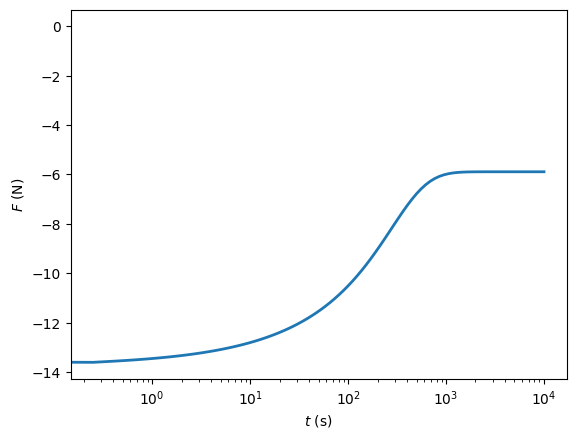

In [7]:
plt.semilogx(sol.t, sol.F, lw = 2)
plt.xlabel('$t$ (s)')
plt.ylabel('$F$ (N)')
plt.show()

## Force-controlled compression

Simulating a force-controlled experiment follows the same pipeline.  In this case, the `ForceControlled` class from the `experiment` module is used.

The initial axial compression is 0.92


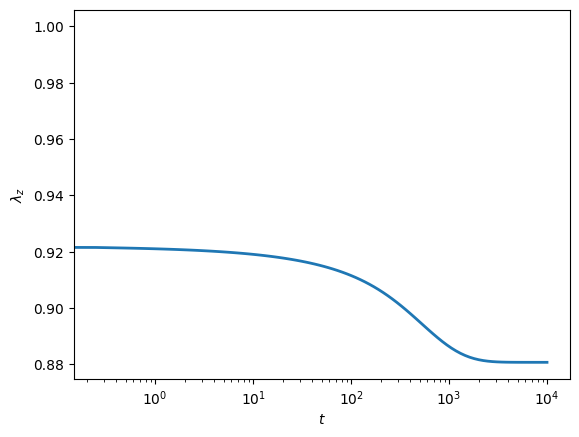

In [8]:
problem = uc.experiments.ForceControlled(model, pars)
sol_instant = problem.initial_response()
sol = problem.transient_response()

# re-dimensionalising the solution
sol_instant.redimensionalise(pars)
sol.redimensionalise(pars)

# printing the initial axial stretch
print(f'The initial axial compression is {sol_instant.lam_z:.2f}')

# plotting the time-dependent axial stretch
plt.semilogx(sol.t, sol.lam_z, lw = 2)
plt.xlabel('$t$')
plt.ylabel('$\lambda_z$')
plt.show()

It some cases, it will be interesting to plot the space and time dependence of variables.  To see what variables are contained in `Solution` objects, we can use the `print` functiom:

In [9]:
print(sol)

Solution object with attributes
t: time
r: radial coordinate in the undeformed state
u: radial displacement
p: fluid pressure
lam_z: axial stretch
F: force on the platten
J: Jacobian determinant
phi: porosity
fluid_load_fraction: fluid load fraction


Now, the fluid pressure will be plotted as a function of space at specific time points.  It is important to note that the variable `r` in the Solution object contains the radial coordinates in the undeformed (Lagrangian) state.

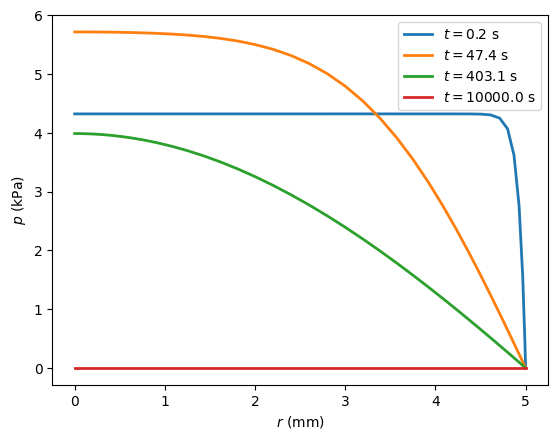

In [10]:
# define the time indices at which to plot the solution
ind = [1, 50, 70, 100]

# convert units of radial coordinate to mm
r_mm = sol.r * 1000

# convert units of pressure to kPa
p_mm = sol.p / 1000

# loop over the indices
for i in ind:
    
    # first index of pressure is for space, second for time
    plt.plot(r_mm, 
             p_mm[:, i], 
             lw = 2, 
             label = f'$t = {sol.t[i]:.1f}$ s')
    
plt.xlabel('$r$ (mm)')
plt.ylabel('$p$ (kPa)')
plt.legend()
plt.show()